## DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>





## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
## import all the modules
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as gobb
# offline.init_notebook_mode()
from collections import Counter

### 1.1 Reading the Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in project train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in project train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in resource train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


### 1.1 Preprocessing Categorical Features: project_grade_category

In [5]:
print("Project grade" ,project_data['project_grade_category'].value_counts(dropna=False))
## visulaize how project grade looks like
print('-'*50)
print(project_data['project_grade_category'].values[1000])
print(project_data['project_grade_category'].values[1500])

Project grade Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64
--------------------------------------------------
Grades 3-5
Grades PreK-2


In [6]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('Grades ','')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

prek_2    44225
3_5       37137
6_8       16923
9_12      10963
Name: project_grade_category, dtype: int64

### 1.2 Preprocessing Categorical Features: project_subject_category

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# reference from course material : reference_EDA.ipynb  
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)


### maintain a dict that 
my_counter=Counter()

for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
cat_dict=dict(my_counter)

sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

### 1.3 Preprocessing Categorical Features: project_subject_subcategory

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3  Preprocessing Categorical Features: school_state

In [9]:
project_data['school_state'].value_counts()
## Convert it to lower
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts(dropna=False)

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

  ## 1.4  Preprocessing Categorical Features: Teacher_prefix

In [10]:
print(project_data['teacher_prefix'].value_counts(dropna=False))
# try to remove the dots from the teacher prefix and replace nan with mrs.
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')
project_data['teacher_prefix']=project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix']=project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix']=project_data['teacher_prefix'].str.strip()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
NaN            3
Name: teacher_prefix, dtype: int64


### 1.5  Combining all the essays

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

#### 1.6  Number of Words in the Essay and Title

In [12]:
source:''''https://www.geeksforgeeks.org/python-program-to-count-words-in-a-sentence/'''
words_counter=[]
for string in project_data['essay']:
    res = len(re.findall(r'\w+', string))
    words_counter.append(res)
    
project_data["words_in_essay"] = words_counter

words_counter=[]

for string in project_data['project_title']:
    res = len(re.findall(r'\w+', string))
    words_counter.append(res)
project_data["words_in_title"] = words_counter    

## 1.7. Preprocessing Numerical Values: price

In [13]:
## calculate the overall count of resources and the total price for each project id 
price_data=resource_data.groupby('id').agg({'price':'sum','quantity':'sum' })


In [14]:
project_data=pd.merge(project_data, price_data, on='id', how='left')

## 1.8 Preprocessing Text Features: project_title

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [18]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [19]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████████████████████████████████████████| 109248/109248 [00:02<00:00, 36843.35it/s]


In [20]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


## 1.9 Preprocessing Text Features: essay

In [21]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [22]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|███████████████████████████████████████████████| 109248/109248 [01:13<00:00, 1484.64it/s]


In [23]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

#merge the column in the project_data
project_data['processed_essay']=preprocessed_essays

printing some random essay
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full time students s

## 1.10 Preprocessing Text Features: Project Title

In [24]:
print("printing some random project_titles")
print(9, project_data['project_title'].values[9])
print('-'*50)
print(34, project_data['project_title'].values[34])
print('-'*50)
print(147, project_data['project_title'].values[147])

printing some random project_titles
9 Just For the Love of Reading--\r\nPure Pleasure
--------------------------------------------------
34 \"Have A Ball!!!\"
--------------------------------------------------
147 Who needs a Chromebook?\r\nWE DO!!


In [25]:
processed_title = preprocess_text(project_data['project_title'].values)

100%|██████████████████████████████████████████████| 109248/109248 [00:05<00:00, 21518.70it/s]


In [26]:
print("printing some random title")
print(9, preprocessed_titles[9])
print('-'*50)
print(34, preprocessed_titles[34])
print('-'*50)
print(147, preprocessed_titles[147])

#merge the column in the project_data
project_data['processed_title']=preprocessed_titles

printing some random title
9 love reading pure pleasure
--------------------------------------------------
34 ball
--------------------------------------------------
147 needs chromebook


## Creating sentiment columns 

In [27]:
## craete the sentiment columns using  

neg=[]
pos=[]
neu=[]
compound=[]
sentiment_model=SentimentIntensityAnalyzer()
for text in tqdm(project_data['processed_essay']):
    pol_scores = sentiment_model.polarity_scores(text)
    neg.append(pol_scores['neg'])
    pos.append(pol_scores['pos'])
    neu.append(pol_scores['neu'])
    compound.append(pol_scores['compound'])
    
project_data['pos']=pos
project_data['neg']=neg
project_data['neu']=neu
project_data['compound']=compound

100%|████████████████████████████████████████████████| 109248/109248 [06:24<00:00, 284.07it/s]


## 2 Train,Test,CV Split

In [28]:
# train test split using sklearn.model selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'],random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train,random_state=0)

In [29]:
## drop the y labels from splits
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [30]:
X_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,words_in_essay,words_in_title,price,quantity,processed_essay,processed_title,pos,neg,neu,compound
75742,118221,p186156,f50f55a2b44b65b54f38f03c5df21922,mrs,tx,2017-03-01 16:21:46,9_12,I-Waste: a Multi-Media Art Installation on El...,My students are creative human beings. They a...,It's no secret that the arts are underfunded i...,...,241,10,945.90,5,students creative human beings sculpture ceram...,waste multi media art installation electronic ...,0.179,0.112,0.709,0.8684
61001,57644,p180433,9e0fb5827f551d7e6966f8b3985e387b,ms,ny,2017-03-09 10:19:06,6_8,Authentic Listening and Speaking Activities fo...,The Hyde Park Central School District is locat...,One area my students struggle the most with is...,...,254,10,100.63,35,hyde park central school district located nort...,authentic listening speaking activities world ...,0.127,0.014,0.859,0.9524


### 3.  VECTORIZING DATA

### 3.1 One hot encoding on Categorical

In [31]:
# we use count vectorizer to convert the values into one hot vectors 
## clean categories

cat_vectorize = CountVectorizer(lowercase=False, binary=True)
cat_vectorize.fit(X_train['clean_categories'].values)

train_categories = cat_vectorize.transform(X_train['clean_categories'].values)
test_categories = cat_vectorize.transform(X_test['clean_categories'].values)
cv_categories = cat_vectorize.transform(X_cv['clean_categories'].values)

print(cat_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",train_categories.shape)
print("Shape of matrix of Test data after one hot encoding ",test_categories.shape)
print("Shape of matrix of CV data after one hot encoding ",cv_categories.shape)

['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']
Shape of matrix of Train data after one hot encoding  (49041, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (24155, 9)


In [32]:
# we use count vectorizer to convert the values into one hot vectors 
## clean subcategories

subcat_vectorize = CountVectorizer(lowercase=False, binary=True)
subcat_vectorize.fit(X_train['clean_subcategories'].values)

train_subcategories = subcat_vectorize.transform(X_train['clean_subcategories'].values)
test_subcategories = subcat_vectorize.transform(X_test['clean_subcategories'].values)
cv_subcategories = subcat_vectorize.transform(X_cv['clean_subcategories'].values)

print(subcat_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",train_subcategories.shape)
print("Shape of matrix of Test data after one hot encoding ",test_subcategories.shape)
print("Shape of matrix of CV data after one hot encoding ",cv_subcategories.shape)


['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']
Shape of matrix of Train data after one hot encoding  (49041, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of CV data after one hot encoding  (24155, 30)


In [33]:
# we use count vectorizer to convert the values into one hot vectors 
##  school state


sklstate_vectorize = CountVectorizer(lowercase=False, binary=True)
sklstate_vectorize.fit(X_train['school_state'].values)

sklstate_train = sklstate_vectorize.transform(X_train['school_state'].values)
sklstate_test = sklstate_vectorize.transform(X_test['school_state'].values)
sklstate_cv = sklstate_vectorize.transform(X_cv['school_state'].values)

print(sklstate_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",sklstate_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sklstate_test.shape)
print("Shape of matrix of CV data after one hot encoding ",sklstate_cv.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix of Train data after one hot encoding  (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of CV data after one hot encoding  (24155, 51)


In [34]:
# we use count vectorizer to convert the values into one hot vectors 
## teacher_prefix
from sklearn.feature_extraction.text import CountVectorizer

teacher_prefix_vectorize = CountVectorizer(lowercase=False, binary=True)
teacher_prefix_vectorize.fit(X_train['teacher_prefix'].values)

teacher_prefix_train = teacher_prefix_vectorize.transform(X_train['teacher_prefix'].values)
teacher_prefix_test = teacher_prefix_vectorize.transform(X_test['teacher_prefix'].values)
teacher_prefix_cv = teacher_prefix_vectorize.transform(X_cv['teacher_prefix'].values)

print(teacher_prefix_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",teacher_prefix_train.shape)
print("Shape of matrix of Test data after one hot encoding ",teacher_prefix_test.shape)
print("Shape of matrix of CV data after one hot encoding ",teacher_prefix_cv.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix of Train data after one hot encoding  (49041, 5)
Shape of matrix of Test data after one hot encoding  (36052, 5)
Shape of matrix of CV data after one hot encoding  (24155, 5)


In [35]:
# we use count vectorizer to convert the values into one hot vectors 
## project_grade

proj_grade_vectorize = CountVectorizer(lowercase=False, binary=True)
proj_grade_vectorize.fit(X_train['project_grade_category'].values)

proj_grade_train = proj_grade_vectorize.transform(X_train['project_grade_category'].values)
proj_grade_test = proj_grade_vectorize.transform(X_test['project_grade_category'].values)
proj_grade_cv = proj_grade_vectorize.transform(X_cv['project_grade_category'].values)

print(proj_grade_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",proj_grade_train.shape)
print("Shape of matrix of Test data after one hot encoding ",proj_grade_test.shape)
print("Shape of matrix of CV data after one hot encoding ",proj_grade_cv.shape)

['3_5', '6_8', '9_12', 'prek_2']
Shape of matrix of Train data after one hot encoding  (49041, 4)
Shape of matrix of Test data after one hot encoding  (36052, 4)
Shape of matrix of CV data after one hot encoding  (24155, 4)


## 3.2 Vectorizing Text data

##### 3.2.1 BOW on Essay data

In [36]:
 ##Considering the words that appeared in atleast 10 documents 

bow_essay = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))  
bow_essay.fit(X_train['processed_essay'])

bow_essay_train = bow_essay.transform(X_train['processed_essay'])

print("Shape of matrix after one hot encoding ",bow_essay_train.shape)   

## tranform Test data

bow_essay_test = bow_essay.transform(X_test['processed_essay'])

print("Shape of matrix after one hot encoding ",bow_essay_test.shape)  


## Teansform cv data

bow_essay_cv = bow_essay.transform(X_cv['processed_essay'])
print("Shape of matrix after one hot encoding ",bow_essay_cv.shape)  

Shape of matrix after one hot encoding  (49041, 5000)
Shape of matrix after one hot encoding  (36052, 5000)
Shape of matrix after one hot encoding  (24155, 5000)


##### 3.2.2 BOW on Title data

In [37]:
 ##Considering the words that appeared in atleast 10 documents 

bow_title = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))  
bow_title.fit(X_train['processed_title'])

bow_title_train = bow_title.transform(X_train['processed_title'])

print("Shape of matrix after one hot encoding ",bow_title_train.shape)   

## tranform Test data

bow_title_test = bow_title.transform(X_test['processed_title'])

print("Shape of matrix after one hot encoding ",bow_title_test.shape)  


## Teansform cv data

bow_title_cv = bow_title.transform(X_cv['processed_title'])
print("Shape of matrix after one hot encoding ",bow_title_cv.shape)  

Shape of matrix after one hot encoding  (49041, 3244)
Shape of matrix after one hot encoding  (36052, 3244)
Shape of matrix after one hot encoding  (24155, 3244)


##### 3.2.3 TFIDF on Essay data

In [38]:
 ##Considering the words that appeared in atleast 10 documents 

tfidf_essay = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))  
tfidf_essay.fit(X_train['processed_essay'])

tfidf_essay_train = tfidf_essay.transform(X_train['processed_essay'])

print("Shape of matrix after one hot encoding ",tfidf_essay_train.shape)   

## tranform Test data

tfidf_essay_test = tfidf_essay.transform(X_test['processed_essay'])

print("Shape of matrix after one hot encoding ",tfidf_essay_test.shape)  


## Teansform cv data

tfidf_essay_cv = tfidf_essay.transform(X_cv['processed_essay'])
print("Shape of matrix after one hot encoding ",tfidf_essay_cv.shape)  

Shape of matrix after one hot encoding  (49041, 5000)
Shape of matrix after one hot encoding  (36052, 5000)
Shape of matrix after one hot encoding  (24155, 5000)


##### 3.2.4 TFIDF on Title data

In [39]:
 ##Considering the words that appeared in atleast 10 documents 

tfidf_title = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))   
tfidf_title.fit(X_train['processed_title'])

tfidf_title_train = tfidf_title.transform(X_train['processed_title'])

print("Shape of matrix after one hot encoding ",tfidf_title_train.shape)   

## tranform Test data

tfidf_title_test = tfidf_title.transform(X_test['processed_title'])

print("Shape of matrix after one hot encoding ",tfidf_title_test.shape)  


## Teansform cv data

tfidf_title_cv = tfidf_title.transform(X_cv['processed_title'])
print("Shape of matrix after one hot encoding ",tfidf_title_cv.shape)  

Shape of matrix after one hot encoding  (49041, 3244)
Shape of matrix after one hot encoding  (36052, 3244)
Shape of matrix after one hot encoding  (24155, 3244)


##### 3.2.5 Avg W2V on Essay data using Pretrained Models

In [40]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
## Glove vectors are global vectors for words which has vector every word in 300d .
## for read more :https://nlp.stanford.edu/projects/glove/
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [41]:
# average Word2Vec on train
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))


# average Word2Vec on CV
# compute average word2vec for each review.

avg_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))


# average Word2Vec on test
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|█████████████████████████████████████████████████| 49041/49041 [00:24<00:00, 1965.82it/s]


49041
300


100%|█████████████████████████████████████████████████| 24155/24155 [00:12<00:00, 1998.78it/s]


24155
300


100%|█████████████████████████████████████████████████| 36052/36052 [00:17<00:00, 2037.32it/s]


36052
300


##### 3.2.6 Avg W2V on Title data using Pretrained Models

In [42]:
# average Word2Vec on train
# compute average word2vec for each review.

avg_w2v_vectors_title_train = []; 

for sentence in tqdm(X_train["processed_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))


# average Word2Vec on CV
# compute average word2vec for each review.

avg_w2v_vectors_title_cv = []; 

for sentence in tqdm(X_cv["processed_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_cv.append(vector)

print(len(avg_w2v_vectors_title_cv))
print(len(avg_w2v_vectors_title_cv[0]))


# average Word2Vec on test
# compute average word2vec for each review.

avg_w2v_vectors_title_test = []; 

for sentence in tqdm(X_test["processed_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_title_test[0]))

100%|████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 46388.13it/s]


49041
300


100%|████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 39886.92it/s]


24155
300


100%|████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 41644.95it/s]


36052
300


##### 3.2.7 Weighted tfidf  on Essay data using Pretrained Models

In [43]:
# average Word2Vec on train
# compute average word2vec for each review.
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["processed_essay"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_train  = []; 

for sentence in tqdm(X_train["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))


# average Word2Vec on CV
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)


print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))


# average Word2Vec on test
# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; 

for sentence in tqdm(X_test["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)


print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████████████████████████████████████████████| 49041/49041 [03:10<00:00, 257.66it/s]


49041
300


100%|██████████████████████████████████████████████████| 24155/24155 [01:31<00:00, 265.00it/s]


24155
300


100%|██████████████████████████████████████████████████| 36052/36052 [02:21<00:00, 255.42it/s]


36052
300


##### 3.2.7 Weighted tfidf  on Title data using Pretrained Models

In [44]:
# average Word2Vec on train
# compute average word2vec for each review.
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["processed_title"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_title_train  = []; 

for sentence in tqdm(X_train["processed_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))


# average Word2Vec on CV
# compute average word2vec for each review.

tfidf_w2v_vectors_title_cv = []; 

for sentence in tqdm(X_cv["processed_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)


print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))


# average Word2Vec on test
# compute average word2vec for each review.

tfidf_w2v_vectors_title_test = []; 

for sentence in tqdm(X_test["processed_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)


print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|████████████████████████████████████████████████| 49041/49041 [00:02<00:00, 19513.53it/s]


49041
300


100%|████████████████████████████████████████████████| 24155/24155 [00:01<00:00, 22377.67it/s]


24155
300


100%|████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 19622.08it/s]


36052
300


### 4. Vectorizing Numerical Features

### 4.1 Price

In [45]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

## reshaping 
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_cv_price_norm=X_cv_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


### 4.2 Quantity

In [46]:

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quantity_train_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
quantity_cv_norm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
quantity_test_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(quantity_train_norm.shape, y_train.shape)
print(quantity_cv_norm.shape, y_cv.shape)
print(quantity_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
quantity_train_norm=quantity_train_norm.reshape(-1,1)
quantity_cv_norm=quantity_cv_norm.reshape(-1,1)
quantity_test_norm=quantity_test_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


### 4.3 Number of Previously posted projects

In [47]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

prev_projects_train_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
prev_projects_cv_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
prev_projects_test_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(prev_projects_train_norm.shape, y_train.shape)
print(prev_projects_cv_norm.shape, y_cv.shape)
print(prev_projects_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
prev_projects_train_norm=prev_projects_train_norm.reshape(-1,1)
prev_projects_cv_norm=prev_projects_cv_norm.reshape(-1,1)
prev_projects_test_norm=prev_projects_test_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


### 4.4 Title Word counts

In [48]:
normalizer = Normalizer()

normalizer.fit(X_train['words_in_title'].values.reshape(1,-1))

title_word_count_train_norm = normalizer.transform(X_train['words_in_title'].values.reshape(1,-1))
title_word_count_cv_norm = normalizer.transform(X_cv['words_in_title'].values.reshape(1,-1))
title_word_count_test_norm = normalizer.transform(X_test['words_in_title'].values.reshape(1,-1))

print("After vectorizations")
print(title_word_count_train_norm.shape, y_train.shape)
print(title_word_count_cv_norm.shape, y_cv.shape)
print(title_word_count_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
title_word_count_train_norm=title_word_count_train_norm.reshape(-1,1)
title_word_count_cv_norm=title_word_count_cv_norm.reshape(-1,1)
title_word_count_test_norm=title_word_count_test_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


### 4.5 Essay Words Counts

In [49]:
normalizer = Normalizer()

normalizer.fit(X_train['words_in_essay'].values.reshape(1,-1))

essay_word_count_train_norm = normalizer.transform(X_train['words_in_essay'].values.reshape(1,-1))
essay_word_count_cv_norm = normalizer.transform(X_cv['words_in_essay'].values.reshape(1,-1))
essay_word_count_test_norm = normalizer.transform(X_test['words_in_essay'].values.reshape(1,-1))

print("After vectorizations")
print(essay_word_count_train_norm.shape, y_train.shape)
print(essay_word_count_cv_norm.shape, y_cv.shape)
print(essay_word_count_test_norm.shape, y_test.shape)

## reshaping 
essay_word_count_train_norm=essay_word_count_train_norm.reshape(-1,1)
essay_word_count_cv_norm=essay_word_count_cv_norm.reshape(-1,1)
essay_word_count_test_norm=essay_word_count_test_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


## 4.6 Vectorizing sentiment Columns

In [50]:
### vectorize pos
Normalize=Normalizer()
Normalize.fit(X_train['pos'].values.reshape(1,-1))
sentiment_pos_train_norm=Normalize.transform(X_train['pos'].values.reshape(1,-1))
sentiment_pos_test_norm=Normalize.transform(X_test['pos'].values.reshape(1,-1))
sentiment_pos_cv_norm=Normalize.transform(X_cv['pos'].values.reshape(1,-1))
sentiment_pos_train_norm=sentiment_pos_train_norm.reshape(-1,1)
sentiment_pos_test_norm=sentiment_pos_test_norm.reshape(-1,1)
sentiment_pos_cv_norm=sentiment_pos_cv_norm.reshape(-1,1)

In [51]:
### vectorize neg
Normalize=Normalizer()
Normalize.fit(X_train['neg'].values.reshape(1,-1))
sentiment_neg_train_norm=Normalize.transform(X_train['neg'].values.reshape(1,-1))
sentiment_neg_test_norm=Normalize.transform(X_test['neg'].values.reshape(1,-1))
sentiment_neg_cv_norm=Normalize.transform(X_cv['neg'].values.reshape(1,-1))
sentiment_neg_train_norm=sentiment_neg_train_norm.reshape(-1,1)
sentiment_neg_test_norm=sentiment_neg_test_norm.reshape(-1,1)
sentiment_neg_cv_norm=sentiment_neg_cv_norm.reshape(-1,1)

In [52]:
### vectorize compound
Normalize=Normalizer()
Normalize.fit(X_train['compound'].values.reshape(1,-1))
sentiment_compound_train_norm=Normalize.transform(X_train['compound'].values.reshape(1,-1))
sentiment_compound_test_norm=Normalize.transform(X_test['compound'].values.reshape(1,-1))
sentiment_compound_cv_norm=Normalize.transform(X_cv['compound'].values.reshape(1,-1))
sentiment_compound_train_norm=sentiment_compound_train_norm.reshape(-1,1)
sentiment_compound_test_norm=sentiment_compound_test_norm.reshape(-1,1)
sentiment_compound_cv_norm=sentiment_compound_cv_norm.reshape(-1,1)

In [53]:
### vectorize neu
Normalize=Normalizer()
Normalize.fit(X_train['neu'].values.reshape(1,-1))
sentiment_neu_train_norm=Normalize.transform(X_train['neu'].values.reshape(1,-1))
sentiment_neu_test_norm=Normalize.transform(X_test['neu'].values.reshape(1,-1))
sentiment_neu_cv_norm=Normalize.transform(X_cv['neu'].values.reshape(1,-1))
sentiment_neu_train_norm=sentiment_neu_train_norm.reshape(-1,1)
sentiment_neu_test_norm=sentiment_neu_test_norm.reshape(-1,1)
sentiment_neu_cv_norm=sentiment_neu_cv_norm.reshape(-1,1)

# Assignment 7: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

### 5.  SET 1 : categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW with bi-grams with min_df=10 and max_features=5000)

In [54]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039


X_tr = hstack((train_categories, train_subcategories,sklstate_train,teacher_prefix_train,
            proj_grade_train,bow_essay_train,bow_title_train,
            X_train_price_norm,quantity_train_norm,prev_projects_train_norm,title_word_count_train_norm,
            essay_word_count_train_norm)).tocsr()

X_te = hstack((test_categories, test_subcategories,sklstate_test,teacher_prefix_test,
            proj_grade_test,bow_essay_test,bow_title_test,
            X_test_price_norm,quantity_test_norm,prev_projects_test_norm,title_word_count_test_norm,
            essay_word_count_test_norm)).tocsr()

X_cr = hstack((cv_categories, cv_subcategories,sklstate_cv,teacher_prefix_cv,
            proj_grade_cv,bow_essay_cv,bow_title_cv,
            X_cv_price_norm,quantity_cv_norm,prev_projects_cv_norm,title_word_count_cv_norm,
            essay_word_count_cv_norm)).tocsr()


print(X_tr.shape)
print(X_te.shape)
print(X_cr.shape)

(49041, 8348)
(36052, 8348)
(24155, 8348)


In [55]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 8348) (49041,)
(24155, 8348) (24155,)
(36052, 8348) (36052,)


### 5.1 Write own function to find which alpha gives maximum auc

In [56]:

## Lets consider a set of alphas from 10 ** -4 to to 10 ** 4
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

c= [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
train_auc=[]
cv_auc=[]
## for each alpha now train the model multiple times and store the cv and train auc for plotting it later.
for i in tqdm(c):
    LR=LogisticRegression(penalty='l2',C=i,n_jobs=3)
    LR.fit(X_tr,y_train)
    y_train_pred=batch_predict(LR,X_tr)
    y_cv_pred=batch_predict(LR,X_cr)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

100%|███████████████████████████████████████████████████████████| 8/8 [00:35<00:00,  4.40s/it]


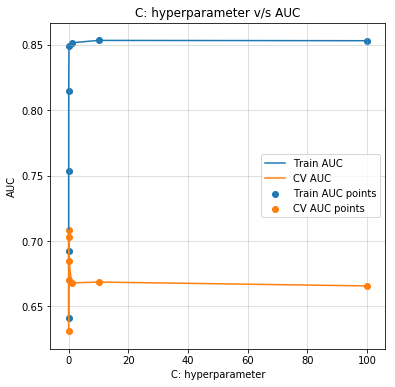

In [57]:

plt.figure(figsize=(6,6))

plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')

plt.scatter(c, train_auc, label='Train AUC points')
plt.scatter(c, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.2)
plt.show()

## Observations
    1. The c values are taken in the range of 10 ** -5 to 10 ** 
    2. We can see a steep drop in AUC as the c value increases above 0.1  
    3. We can see as the c values increase in train data AUC also increases.While it is opposite in the case of cv data implying the case of overfitting .
    4. with a c value less than 1 we can see both cv and train data AUC converge.
    5.Optimal c value which can be selected in this can be 0.001

### 5.2 GridSearch CV using K-fold Crossvalidation with k=10

In [58]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

## As we are seeing steady decreasing in AUC value in CV as c value increases more than 1 .Hence keep more values less 
## than 1 
parameters={"C" : [0.0001,0.001,0.01,0.1,0.6,1,5,10,20] }

clf = GridSearchCV(LR,parameters, cv=5, scoring='roc_auc',verbose=1,n_jobs=3,return_train_score=True)
clf.fit(X_tr, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:   59.7s finished


In [59]:
results = results.sort_values(['param_C'])
RS_alphas=results['param_C']
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

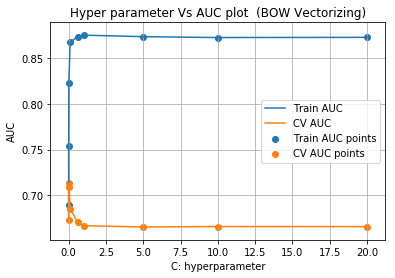

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.193842,0.053759,0.013450,0.001847,0.0001,{'C': 0.0001},0.676880,0.679327,0.663630,0.675099,...,0.672731,0.005749,4,0.688840,0.688777,0.689520,0.689274,0.690130,0.689308,0.000494
1,2.556824,0.103688,0.013152,0.001134,0.001,{'C': 0.001},0.711388,0.713364,0.703465,0.709601,...,0.708885,0.003504,2,0.753144,0.752655,0.754121,0.753828,0.753824,0.753514,0.000536
2,4.170823,0.068766,0.014387,0.001301,0.01,{'C': 0.01},0.716206,0.717785,0.707984,0.713126,...,0.713403,0.003427,1,0.822465,0.822110,0.823521,0.822839,0.822399,0.822667,0.000486
3,4.167730,0.080110,0.014416,0.001293,0.1,{'C': 0.1},0.691922,0.688252,0.679283,0.686546,...,0.685731,0.004391,3,0.866793,0.868801,0.867318,0.866669,0.865235,0.866963,0.001149
4,4.098698,0.033398,0.013387,0.002114,0.6,{'C': 0.6},0.674811,0.674728,0.665261,0.672970,...,0.670699,0.004303,5,0.874682,0.874874,0.872250,0.873351,0.869892,0.873010,0.001827


In [60]:
plt.plot(RS_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(RS_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(RS_alphas, train_auc, label='Train AUC points')
plt.scatter(RS_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot  (BOW Vectorizing)")
plt.grid()
plt.show()

results.head()

## Observations
    1.Using Grid Search technique we find that as C values increase after 0.001,AUC decreases steeply and maintains a steadiness beyond that.
    2.Clearly we see the case of overfit from the graph when C values are beyond 1 (i.e very high train AUC and low CV AUC)
    3.Both Train and CV auc converge below 0.01.

### 5.3 Train the model using the best Hyperparameter value

In [61]:
### https://forums.fast.ai/t/hyperparameter-random-search-interpretation/8591 ---to get the best hyper parameter as a reuslt of Random search
best_C = clf.best_params_
print('Best Alpha as a result of Grid Search',best_C)

Best Alpha as a result of Grid Search {'C': 0.01}


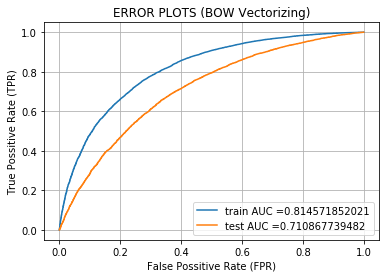

In [63]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

LR=LogisticRegression(penalty="l2",C=best_C['C'],n_jobs=3)
LR.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(LR, X_tr)    
y_test_pred = batch_predict(LR, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Possitive Rate (FPR)")
plt.ylabel("True Possitive Rate (TPR)")
plt.title("ERROR PLOTS (BOW Vectorizing)")
plt.grid()
plt.show()

## Observations : 
    1. Test AUC found to be 0.78 and Train AUC as 0.81 after training model using best hyperparameter 0.01 and vectorizing text data using Bag Of Words .
  

## 5.4 Confusion Matrix

In [64]:
## Finding best threshold for predictions
def best_threshold(thresholds,fpr,tpr):
    t=thresholds[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [65]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t=best_threshold(tr_thresholds,train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.548061596919 for threshold 0.821
Train confusion matrix
[[ 5371  2055]
 [10081 31534]]
Test confusion matrix
[[ 3173  2286]
 [ 8177 22416]]


#### 5.4.1 Ploting Confusion Matrix on Train data

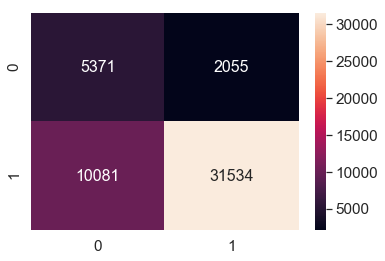

In [66]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

#### 5.4.2 Ploting Confusion Matrix on Test data

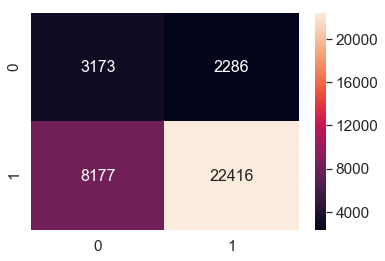

In [67]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

## Observations :
         1.We can observe from train and test we are getting majority True positives
         2.Least number of data falls in False negative,which refers as least number of projects were incorrectly predicted as not approved in both Test and Train.
         3.For a model to perform well we need High True Positive Rate and Low False Positive Rate.From the above our train data has True Positive Rate as 91% and False Positive Rate as 75%
         4.In our test data : True Positive Rate as 90% and False Positive Rate as 76.7%. 
         5.Test data is nearly accurate as train data.

### 6.  SET 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_eassay (TFIDF with bi-grams with min_df=10 and max_features=5000)

In [68]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


X_tr = hstack((train_categories, train_subcategories,sklstate_train,teacher_prefix_train,
            proj_grade_train,tfidf_essay_train,tfidf_title_train,
            X_train_price_norm,quantity_train_norm,prev_projects_train_norm,title_word_count_train_norm,
            essay_word_count_train_norm)).tocsr()

X_te = hstack((test_categories, test_subcategories,sklstate_test,teacher_prefix_test,
            proj_grade_test,tfidf_essay_test,tfidf_title_test,
            X_test_price_norm,quantity_test_norm,prev_projects_test_norm,title_word_count_test_norm,
            essay_word_count_test_norm)).tocsr()

X_cr = hstack((cv_categories, cv_subcategories,sklstate_cv,teacher_prefix_cv,
            proj_grade_cv,tfidf_essay_cv,tfidf_title_cv,
            X_cv_price_norm,quantity_cv_norm,prev_projects_cv_norm,title_word_count_cv_norm,
            essay_word_count_cv_norm)).tocsr()


print(X_tr.shape)
print(X_te.shape)
print(X_cr.shape)

(49041, 8348)
(36052, 8348)
(24155, 8348)


In [69]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 8348) (49041,)
(24155, 8348) (24155,)
(36052, 8348) (36052,)


### 6.1 Write own function to find which alpha gives maximum auc

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
## Lets consider a set of alphas from 10 ** -4 to to 10 ** 4

c= [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
train_auc=[]
cv_auc=[]
## for each alpha now train the model multiple times and store the cv and train auc for plotting it later.
for i in tqdm(c):
    LR=LogisticRegression(penalty="l2",C=i,n_jobs=3)
    LR.fit(X_tr,y_train)
    y_train_pred=batch_predict(LR,X_tr)
    y_cv_pred=batch_predict(LR,X_cr)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

100%|███████████████████████████████████████████████████████████| 8/8 [00:30<00:00,  3.84s/it]


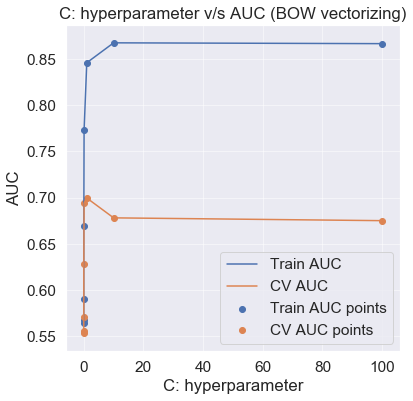

In [72]:

plt.figure(figsize=(6,6))

plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')

plt.scatter(c, train_auc, label='Train AUC points')
plt.scatter(c, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC (BOW vectorizing)")
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.2)
plt.show()

## Observations
    1. The c values are taken in the range of 10 ** -5 to 10 ** 2
    2. We can see a steep drop in AUC as the c value increases above 0.1  
    3. We can see as the c values increase in train data AUC also increases.While it is opposite in the case of cv data implying the case of overfitting .
    4. with a c value less than 1 we can see both cv and train data AUC converge.
    5.Optimal c value which can be selected in this can be 0.001 /0.01 .

### 6.2 GridSearch CV using K-fold Crossvalidation with k=10

In [77]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

## As we are seeing steady decreasing in AUC value in CV as c value increases more than 1 .Hence keep more values less 
## than 1 
parameters={"C" : [0.0001,0.001,0.01,0.1,0.6,1,5,10,20] }

clf = GridSearchCV(LR, parameters,return_train_score=True,cv=5, scoring='roc_auc',verbose=1,n_jobs=3)
clf.fit(X_tr, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
    

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:   51.5s finished


In [78]:
results = results.sort_values(['param_C'])
RS_alphas=results['param_C']
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

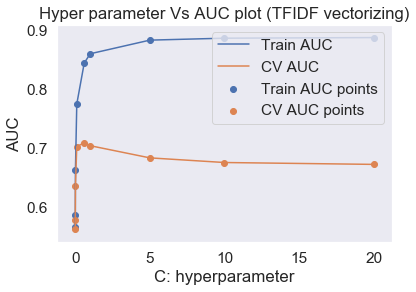

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.546082,0.027421,0.013334,0.003953,0.0001,{'C': 0.0001},0.570097,0.558643,0.564393,0.562584,...,0.563047,0.004089,9,0.565737,0.568826,0.567795,0.567953,0.568791,0.567821,0.001124
1,0.638051,0.160989,0.013557,0.001385,0.001,{'C': 0.001},0.588894,0.573337,0.580318,0.578605,...,0.578912,0.005712,8,0.585099,0.587746,0.587481,0.587743,0.588845,0.587383,0.001235
2,1.859549,0.119618,0.017579,0.001035,0.01,{'C': 0.01},0.648677,0.633101,0.636064,0.636344,...,0.636536,0.006696,7,0.662225,0.661695,0.664037,0.662114,0.663800,0.662774,0.000954
3,4.323542,0.381404,0.013335,0.000560,0.1,{'C': 0.1},0.711483,0.701515,0.698013,0.703077,...,0.702781,0.004668,3,0.774243,0.773753,0.775575,0.774964,0.774664,0.774640,0.000620
4,4.528854,0.160870,0.014351,0.001719,0.6,{'C': 0.6},0.716366,0.710137,0.704070,0.706579,...,0.709298,0.004133,1,0.843535,0.843586,0.843726,0.844635,0.843522,0.843801,0.000423


In [79]:
plt.plot(RS_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(RS_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(RS_alphas, train_auc, label='Train AUC points')
plt.scatter(RS_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot (TFIDF vectorizing)")
plt.grid()
plt.show()

results.head()

## Observations
     1.Using Grid Search technique we find that as C values increase after 0.001,AUC decreases steeply and maintains a steadiness beyond that.
    2.Clearly we see the case of overfit from the graph when C values are beyond 1 (i.e very high train AUC and low CV AUC)


### 6.3 Train the model using the best Hyperparameter value

In [81]:
### https://forums.fast.ai/t/hyperparameter-random-search-interpretation/8591 ---to get the best hyper parameter as a reuslt of Random search
best_C = clf.best_params_
print('Best Alpha as a result of Grid Search',best_C)

Best Alpha as a result of Grid Search {'C': 0.6}


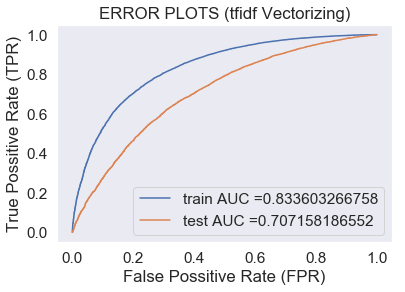

In [83]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


LR=LogisticRegression(penalty="l2",C=0.6,n_jobs=3)
LR.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(LR, X_tr)    
y_test_pred = batch_predict(LR, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Possitive Rate (FPR)")
plt.ylabel("True Possitive Rate (TPR)")
plt.title("ERROR PLOTS (tfidf Vectorizing)")
plt.grid()
plt.show()

## Observations : 
    1. Test AUC found to be 0.71 and Train AUC as 0.83 after training model using best hyperparameter 1 and vectorizing
        text data using TFIDF
    2. TFIDF performs better than Bag of Words .     

## 6.4 Confusion Matrix

In [84]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t=best_threshold(tr_thresholds,train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.570870854274 for threshold 0.829
Train confusion matrix
[[ 5647  1779]
 [10374 31241]]
Test confusion matrix
[[ 3189  2270]
 [ 8580 22013]]


#### 6.4.1 Ploting Confusion Matrix on Train data

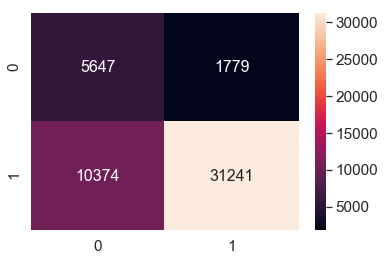

In [85]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

#### 6.4.2 Ploting Confusion Matrix on Test data

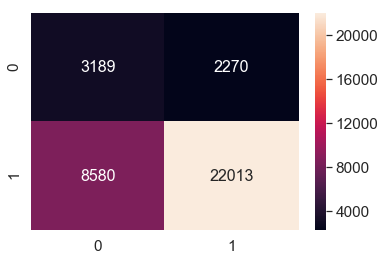

In [86]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

## Observations :
         1.We can observe from train and test we are getting majority True positives
         2.Least number of data falls in False negative,which refers as least number of projects were incorrectly predicted as not approved in both Test and Train.
         3.For a model to perform well we need High True Positive Rate and Low False Positive Rate.From the above our train data has True Positive Rate as 95% and False Positive Rate as 65%
         4.In our test data : True Positive Rate as 91% and False Positive Rate as 73%. 
         5.Test data AUC is not close to train AUC.
         6.TFIDF performs better than Bag of words as it has higher % of true positives rate and lower % of False positive rates .
         

### 7.  SET 3 : categorical, numerical features + project_titleAVG W2V)+ preprocessed_eassay (AVG W2V)

In [87]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


X_tr = hstack((train_categories, train_subcategories,sklstate_train,teacher_prefix_train,
            proj_grade_train,avg_w2v_vectors_train,avg_w2v_vectors_title_train,
            X_train_price_norm,quantity_train_norm,prev_projects_train_norm,title_word_count_train_norm,
            essay_word_count_train_norm)).tocsr()

X_te = hstack((test_categories, test_subcategories,sklstate_test,teacher_prefix_test,
            proj_grade_test,avg_w2v_vectors_test,avg_w2v_vectors_title_test,
            X_test_price_norm,quantity_test_norm,prev_projects_test_norm,title_word_count_test_norm,
            essay_word_count_test_norm)).tocsr()

X_cr = hstack((cv_categories, cv_subcategories,sklstate_cv,teacher_prefix_cv,
            proj_grade_cv,avg_w2v_vectors_cv,avg_w2v_vectors_title_cv,
            X_cv_price_norm,quantity_cv_norm,prev_projects_cv_norm,title_word_count_cv_norm,
            essay_word_count_cv_norm)).tocsr()


print(X_tr.shape)
print(X_te.shape)
print(X_cr.shape)

(49041, 704)
(36052, 704)
(24155, 704)


In [88]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 704) (49041,)
(24155, 704) (24155,)
(36052, 704) (36052,)


### 7.1 Write own function to find which alpha gives maximum auc

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
## Lets consider a set of alphas from 10 ** -4 to to 10 ** 4
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred 
c= [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
train_auc=[]
cv_auc=[]
## for each alpha now train the model multiple times and store the cv and train auc for plotting it later.
for i in tqdm(c):
    LR=LogisticRegression(penalty="l2",C=i,n_jobs=3)
    LR.fit(X_tr,y_train)
    y_train_pred=batch_predict(LR,X_tr)
    y_cv_pred=batch_predict(LR,X_cr)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

100%|███████████████████████████████████████████████████████████| 8/8 [01:57<00:00, 14.67s/it]


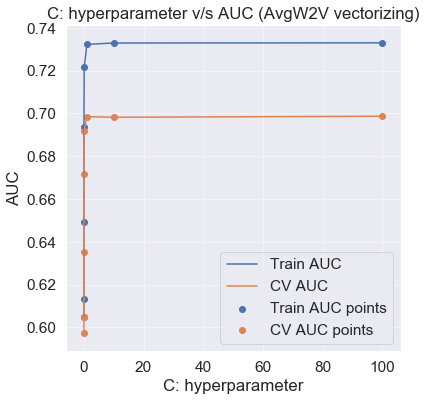

In [93]:

plt.figure(figsize=(6,6))

plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')

plt.scatter(c, train_auc, label='Train AUC points')
plt.scatter(c, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC (AvgW2V vectorizing)")
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.2)
plt.show()

## Observations
    1. The c values are taken in the range of 10 ** -5 to 10 ** 2
    2. Model performs well in test as well unlike TFIDF and BOW as we dont see any drop in AUC as C value increases.  
    4. As C value increases more than 10 ,we see the curve tends to maintain a constant AUC .
    5.Optimal c value which can be selected in this can be 10 .

### 7.2 GridSearch CV using K-fold Crossvalidation with k=10

In [98]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
## As we are seeing steady decreasing in AUC value in CV as c value increases more than 1 .Hence keep more values less 
## than 1 
## time complexity increases as number of params increases hence reducing the cv to 3 
## better to choose parameters below 15 as we saw as number of parameter increases beyond 10 curve maintains steadiness.
parameters={"C" : [0.0001,0.001,0.01,0.1,0.6,15] }

clf = GridSearchCV(LogisticRegression(),parameters,return_train_score=True, cv=3, scoring='roc_auc',verbose=2,n_jobs=3)
clf.fit(X_tr, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:   57.0s finished


In [99]:
results = results.sort_values(['param_C'])
RS_alphas=results['param_C']
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

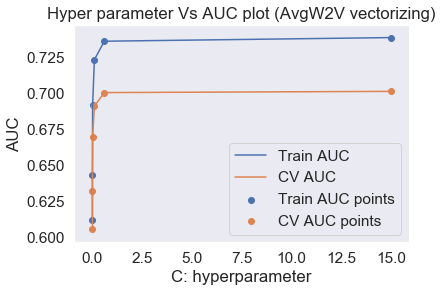

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.598803,0.076121,0.061490,3.886097e-03,0.0001,{'C': 0.0001},0.604057,0.614561,0.597704,0.605441,0.006951,6,0.612198,0.611032,0.613297,0.612176,0.000925
1,3.588904,0.093584,0.064000,1.325077e-06,0.001,{'C': 0.001},0.631559,0.639590,0.624728,0.631959,0.006074,5,0.642570,0.643187,0.644382,0.643380,0.000752
2,9.496942,0.752247,0.060000,7.867412e-07,0.01,{'C': 0.01},0.670737,0.673017,0.665133,0.669629,0.003312,4,0.690365,0.692960,0.691620,0.691648,0.001060
3,12.769815,0.158370,0.068156,3.191006e-03,0.1,{'C': 0.1},0.692827,0.690926,0.689305,0.691019,0.001439,3,0.721735,0.724039,0.724133,0.723302,0.001109
4,13.127893,0.268059,0.062734,1.547107e-02,0.6,{'C': 0.6},0.703818,0.700155,0.697212,0.700395,0.002702,2,0.734615,0.737274,0.736277,0.736055,0.001097


In [101]:
plt.plot(RS_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(RS_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(RS_alphas, train_auc, label='Train AUC points')
plt.scatter(RS_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot (AvgW2V vectorizing)")
plt.grid()
plt.show()

results.head()

### 7.3 Train the model using the best Hyperparameter value

In [104]:
### https://forums.fast.ai/t/hyperparameter-random-search-interpretation/8591 ---to get the best hyper parameter as a reuslt of Random search
best_C = clf.best_params_
print('Best Alpha as a result of Grid Search',best_C)

Best Alpha as a result of Grid Search {'C': 15}


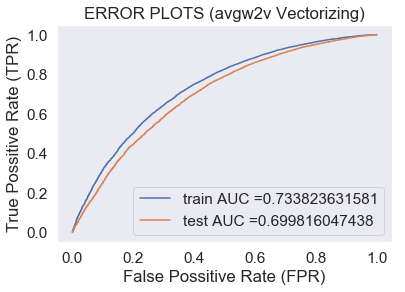

In [106]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


LR=LogisticRegression(penalty="l2",C=15,n_jobs=3)
LR.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(LR, X_tr)    
y_test_pred = batch_predict(LR, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Possitive Rate (FPR)")
plt.ylabel("True Possitive Rate (TPR)")
plt.title("ERROR PLOTS (avgw2v Vectorizing)")
plt.grid()
plt.show()

## Observations : 
    1. Test AUC found to be 0.69 and Train AUC as 0.73 after training model using best hyperparameter 1 and vectorizing text data using AvgW2V
    2. TFIDF performs better than Bag of Words and AvgW2V.     

## 7.4 Confusion Matrix

In [107]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t=best_threshold(tr_thresholds,train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.456496841971 for threshold 0.836
Train confusion matrix
[[ 4801  2625]
 [12231 29384]]
Test confusion matrix
[[ 3282  2177]
 [ 9210 21383]]


#### 7.4.1 Ploting Confusion Matrix on Train data

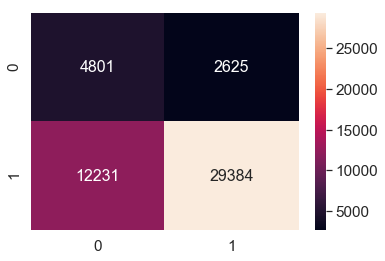

In [108]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

#### 7.4.2 Ploting Confusion Matrix on Test data

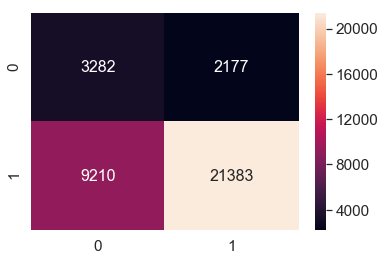

In [109]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

## Observations :
         1.We can observe from train and test we are getting majority True positives
         2.Least number of data falls in False negative,which refers as least number of projects were incorrectly predicted as not approved in both Test and Train.
         3.For a model to perform well we need High True Positive Rate and Low False Positive Rate.From the above our train data has True Positive Rate as 91% and False Positive Rate as 71.8%
         4.In our test data : True Positive Rate as 91% and False Positive Rate as 73.7%.  .
         

### 8.  SET 4 : categorical, numerical features + project_title(tfidf W2V)+ preprocessed_eassay (tfidf W2V)

In [149]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039


X_tr = hstack((train_categories, train_subcategories,sklstate_train,teacher_prefix_train,
            proj_grade_train,tfidf_w2v_vectors_train,tfidf_w2v_vectors_title_train,
            X_train_price_norm,quantity_train_norm,prev_projects_train_norm,title_word_count_train_norm,
            essay_word_count_train_norm)).tocsr()

X_te = hstack((test_categories, test_subcategories,sklstate_test,teacher_prefix_test,
            proj_grade_test,tfidf_w2v_vectors_test,tfidf_w2v_vectors_title_test,
            X_test_price_norm,quantity_test_norm,prev_projects_test_norm,title_word_count_test_norm,
            essay_word_count_test_norm)).tocsr()

X_cr = hstack((cv_categories, cv_subcategories,sklstate_cv,teacher_prefix_cv,
            proj_grade_cv,tfidf_w2v_vectors_cv,tfidf_w2v_vectors_title_cv,
            X_cv_price_norm,quantity_cv_norm,prev_projects_cv_norm,title_word_count_cv_norm,
            essay_word_count_cv_norm)).tocsr()


print(X_tr.shape)
print(X_te.shape)
print(X_cr.shape)

(49041, 704)
(36052, 704)
(24155, 704)


In [150]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 704) (49041,)
(24155, 704) (24155,)
(36052, 704) (36052,)


### 8.1 Write own function to find which alpha gives maximum auc

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
## Lets consider a set of alphas from 10 ** -5 to to 10 ** 2

c= [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
train_auc=[]
cv_auc=[]
## for each alpha now train the model multiple times and store the cv and train auc for plotting it later.
for i in tqdm(c):
    LR=LogisticRegression(penalty="l2",C=i,n_jobs=3)
    LR.fit(X_tr,y_train)
    y_train_pred=batch_predict(LR,X_tr)
    y_cv_pred=batch_predict(LR,X_cr)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))

100%|███████████████████████████████████████████████████████████| 8/8 [01:03<00:00,  7.91s/it]


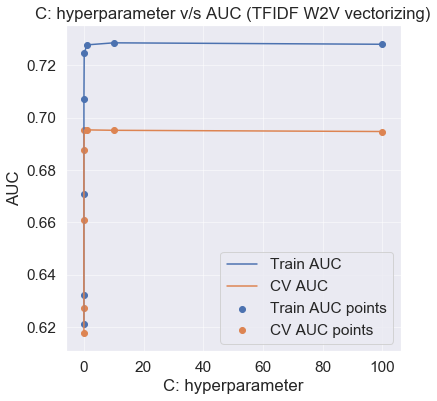

In [153]:

plt.figure(figsize=(6,6))

plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')

plt.scatter(c, train_auc, label='Train AUC points')
plt.scatter(c, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC (TFIDF W2V vectorizing)")
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.2)
plt.show()

## Observations
    1. The c values are taken in the range of 10 ** -5 to 10 ** 2
    2. Model performs well in test as well unlike TFIDF and BOW as we dont see any drop in AUC as C value increases.  
    4. As C value increases more than 10 ,we see the curve tends to maintain a constant AUC .
 

### 8.2 GridSearch CV using K-fold Crossvalidation with k=10

In [155]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

## As we are seeing steady decreasing in AUC value in CV as c value increases more than 1 .Hence keep more values less 
## than 1 
parameters={"C" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100] }

clf = GridSearchCV(LogisticRegression(), parameters,return_train_score=True, cv=3, scoring='roc_auc',verbose=1,n_jobs=3)
clf.fit(X_tr, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:  1.1min finished


In [156]:
results = results.sort_values(['param_C'])
RS_alphas=results['param_C']
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

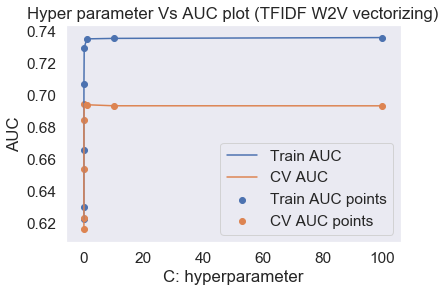

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.221395,0.027977,0.071820,0.001628,1e-05,{'C': 1e-05},0.614884,0.628415,0.605008,0.616102,0.009595,8,0.622798,0.621555,0.622902,0.622418,0.000612
1,2.273586,0.068191,0.052526,0.004630,0.0001,{'C': 0.0001},0.622038,0.634861,0.612612,0.623170,0.009119,7,0.630641,0.629576,0.630728,0.630315,0.000524
2,3.858680,0.310669,0.046565,0.003304,0.001,{'C': 0.001},0.652642,0.662772,0.645173,0.653529,0.007212,6,0.665051,0.665066,0.665835,0.665317,0.000366
3,9.835030,0.508514,0.053524,0.006002,0.01,{'C': 0.01},0.684188,0.688978,0.679134,0.684100,0.004019,5,0.706368,0.706949,0.707288,0.706868,0.000380
4,10.519863,0.192067,0.053203,0.004717,0.1,{'C': 0.1},0.696801,0.696148,0.690633,0.694527,0.002766,1,0.728341,0.729731,0.730609,0.729560,0.000934


In [157]:
plt.plot(RS_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(RS_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(RS_alphas, train_auc, label='Train AUC points')
plt.scatter(RS_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot (TFIDF W2V vectorizing)")
plt.grid()
plt.show()

results.head()

### 8.3 Train the model using the best Hyperparameter value

In [158]:
### https://forums.fast.ai/t/hyperparameter-random-search-interpretation/8591 ---to get the best hyper parameter as a reuslt of Random search
best_C = clf.best_params_
print('Best Alpha as a result of Grid Search',best_C)

Best Alpha as a result of Grid Search {'C': 0.1}


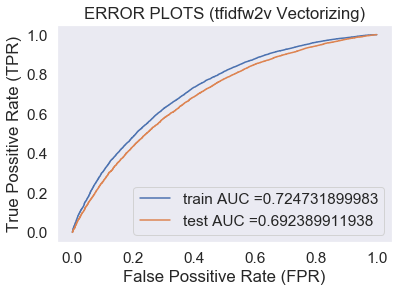

In [159]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


LR=LogisticRegression(penalty="l2",C=best_C['C'],n_jobs=3)
LR.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(LR, X_tr)    
y_test_pred = batch_predict(LR, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Possitive Rate (FPR)")
plt.ylabel("True Possitive Rate (TPR)")
plt.title("ERROR PLOTS (tfidfw2v Vectorizing)")
plt.grid()
plt.show()

## Observations : 
    1. Test AUC found to be 0.69 and Train AUC as 0.72 after training model using best hyperparameter 0.69 and vectorizing text data using TFIDF    

## 8.4 Confusion Matrix

In [125]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t=best_threshold(tr_thresholds,train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.448492340575 for threshold 0.834
Train confusion matrix
[[ 4821  2605]
 [12866 28749]]
Test confusion matrix
[[ 3300  2159]
 [ 9810 20783]]


#### 8.4.1 Ploting Confusion Matrix on Train data

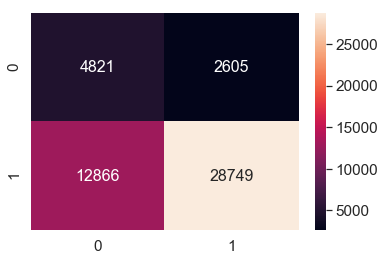

In [126]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

#### 8.4.2 Ploting Confusion Matrix on Test data

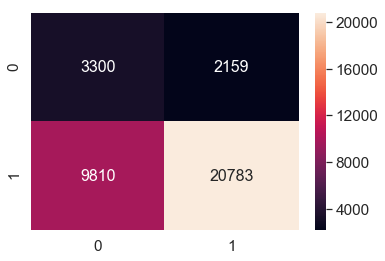

In [127]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

## Observations :
         1.We can observe from train and test we are getting majority True positives
         2.Least number of data falls in False negative,which refers as least number of projects were incorrectly predicted as not approved in both Test and Train.
         3.For a model to perform well we need High True Positive Rate and Low False Positive Rate.From the above our train data has True Positive Rate as 93% and False Positive Rate as 65%
         4.In our test data : True Positive Rate as 91% and False Positive Rate as 71%. 
         5.TFIDF performs better than Bag of words as it has higher % of true positives rate and lower % of False positive rates .
         

## 9. Set5 . Apply Logistic Regression on the specified feature set Set 5 by finding the best hyper parameter as suggested in step 2 and step 3

In [128]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr = hstack((train_categories, train_subcategories,sklstate_train,teacher_prefix_train,
            proj_grade_train,sentiment_neg_train_norm,
            X_train_price_norm,quantity_train_norm,
            prev_projects_train_norm,title_word_count_train_norm,
            essay_word_count_train_norm)).tocsr()

X_te = hstack((test_categories, test_subcategories,sklstate_test,teacher_prefix_test,
            proj_grade_test,sentiment_neg_test_norm,
            X_test_price_norm,quantity_test_norm,
            prev_projects_test_norm,title_word_count_test_norm,
            essay_word_count_test_norm)).tocsr()

X_cr = hstack((cv_categories, cv_subcategories,sklstate_cv,teacher_prefix_cv,
            proj_grade_cv,sentiment_neg_cv_norm,
            X_cv_price_norm,quantity_cv_norm,
            prev_projects_cv_norm,title_word_count_cv_norm,
            essay_word_count_cv_norm)).tocsr()


print(X_tr.shape)
print(X_te.shape)
print(X_cr.shape)

(49041, 105)
(36052, 105)
(24155, 105)


## Training model with different c values

In [130]:

### Train the model with loops
train_auc=[]
cv_auc=[]
c=[0.00001,0.0001,0.001,0.01,0.1,1,10,20,50,100,500,1000]
for i in tqdm(c):
    LR=LogisticRegression(C=i,penalty='l2',n_jobs=3)
    LR.fit(X_tr,y_train)
    train_pred=batch_predict(LR,X_tr)
    cv_pred=batch_predict(LR,X_cr)
    train_auc.append(roc_auc_score(y_train,train_pred))
    cv_auc.append(roc_auc_score(y_cv,cv_pred))

100%|█████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.60it/s]


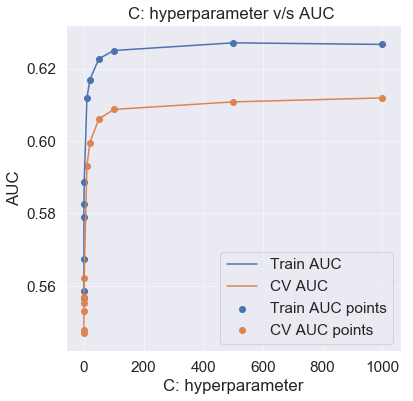

In [131]:
plt.figure(figsize=(6,6))

plt.plot(c, train_auc, label='Train AUC')
plt.plot(c, cv_auc, label='CV AUC')

plt.scatter(c, train_auc, label='Train AUC points')
plt.scatter(c, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC ")
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.2)
plt.show()

## Training model using Gridsearchcv 

In [138]:
parameters = {"C" : [0.0001,0.001,0.01,0.1,0.6,15,20] }

grid_model=GridSearchCV(LR,parameters,return_train_score=True,n_jobs=3,scoring='roc_auc',cv=5)
grid_model.fit(X_tr,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(C=1000, n_jobs=3), n_jobs=3,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.6, 15, 20]},
             return_train_score=True, scoring='roc_auc')

In [139]:
results=pd.DataFrame.from_dict(grid_model.cv_results_)
RS_alphas=results['param_C']
train_auc=results['mean_train_score']
cv_auc=results['mean_test_score']

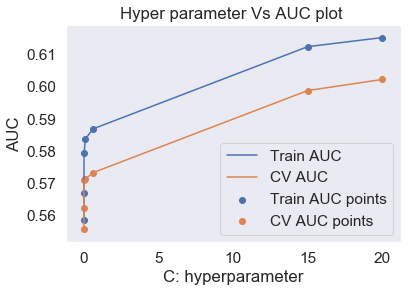

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.119279,0.001493,0.004589,0.000798,0.0001,{'C': 0.0001},0.562555,0.550991,0.556968,0.555057,...,0.555516,0.004114,7,0.556408,0.559688,0.558107,0.558905,0.559555,0.558533,0.001201
1,0.119480,0.000746,0.005785,0.001162,0.001,{'C': 0.001},0.572008,0.556316,0.564359,0.561480,...,0.562257,0.005689,6,0.563897,0.567761,0.566238,0.567427,0.568449,0.566754,0.001598
2,0.243848,0.039447,0.007187,0.000746,0.01,{'C': 0.01},0.583984,0.565542,0.572532,0.567999,...,0.570782,0.007219,5,0.575853,0.580148,0.579141,0.580159,0.581200,0.579300,0.001842
3,0.545133,0.075107,0.005386,0.001197,0.1,{'C': 0.1},0.585985,0.565890,0.572392,0.567554,...,0.571192,0.007891,4,0.579931,0.584752,0.583543,0.584162,0.585836,0.583645,0.002005
4,0.540406,0.040533,0.004382,0.000482,0.6,{'C': 0.6},0.588760,0.567409,0.574234,0.569279,...,0.573155,0.008277,3,0.582920,0.588233,0.586713,0.587135,0.588912,0.586783,0.002083


In [140]:
plt.plot(RS_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(RS_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(RS_alphas, train_auc, label='Train AUC points')
plt.scatter(RS_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot ")
plt.grid()
plt.show()

results.head()

In [141]:
### https://forums.fast.ai/t/hyperparameter-random-search-interpretation/8591 ---to get the best hyper parameter as a reuslt of Random search
best_C = grid_model.best_params_
print('Best Alpha as a result of Grid Search',best_C)

Best Alpha as a result of Grid Search {'C': 20}


## Train the model using the best parameter

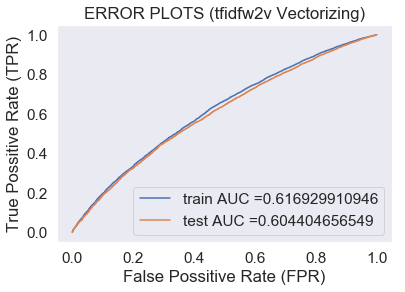

In [143]:
LR = LogisticRegression(C=best_C['C'],penalty='l2',n_jobs=3)
LR.fit(X_tr,y_train)
# Predict
y_train_pred=batch_predict(LR,X_tr)
y_test_pred=batch_predict(LR,X_te)
# FPR,TPR,thresholds
train_fpr,train_tpr,tr_thresholds=roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,te_thresholds=roc_curve(y_test,y_test_pred)
#
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Possitive Rate (FPR)")
plt.ylabel("True Possitive Rate (TPR)")
plt.title("ERROR PLOTS (tfidfw2v Vectorizing)")
plt.grid()
plt.show()


## Plotting Confusion Matrix on Train


In [144]:
best_t=best_threshold(tr_thresholds,train_fpr,train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2), range(2))

the maximum value of tpr*(1-fpr) 0.342058548506 for threshold 0.844
Train confusion matrix
[[ 4101  3325]
 [15839 25776]]
Test confusion matrix
[[ 2964  2495]
 [12110 18483]]


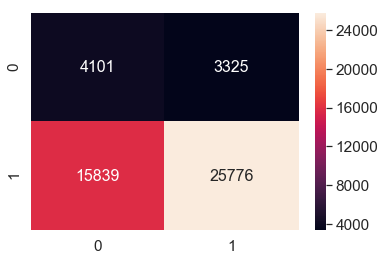

In [145]:
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

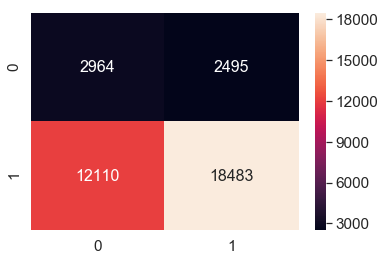

In [146]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

In [160]:
##http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", " Train AUC" ,"Test AUC "]

x.add_row(["BOW", "Logistic Regression", 0.01, 0.81,0.71])
x.add_row(["TFIDF", "Logistic Regression",0.6, 0.83, 0.70])
x.add_row(["AvgW2v", "Logistic Regression",15, 0.73, 0.69])
x.add_row(["TFIDF w2v", "Logistic Regression",0.1, 0.72, 0.69])
x.add_row(["Without text", "Logistic Regression",20, 0.61, 0.60])
print(x)

+--------------+---------------------+-----------------+------------+-----------+
|  Vectorizer  |        Model        | Hyper Parameter |  Train AUC | Test AUC  |
+--------------+---------------------+-----------------+------------+-----------+
|     BOW      | Logistic Regression |       0.01      |    0.81    |    0.71   |
|    TFIDF     | Logistic Regression |       0.6       |    0.83    |    0.7    |
|    AvgW2v    | Logistic Regression |        15       |    0.73    |    0.69   |
|  TFIDF w2v   | Logistic Regression |       0.1       |    0.72    |    0.69   |
| Without text | Logistic Regression |        20       |    0.61    |    0.6    |
+--------------+---------------------+-----------------+------------+-----------+
